#### Brittany Ahn

**Date:** September 6, 2024

**Course:** CASMA665 Mathematical Neuroscience

**Assignment:** Independently working

**Descr:** Playing with toy single compartment INF and LIF models

**Resources:** Integrate Fire Neuron module at 
https://mark-kramer.github.io/BU-MA665-MA666/IF.html

**Fun stuff:** Theoretical Neuroscience textbook by Dayan and Abbott

Section 5.4: INF Models (Pg. 162-165)

https://boulderschool.yale.edu/sites/default/files/files/DayanAbbott.pdf


___


### INF Model

**Eq1: Law of conservation of current.** The capacitive & resistive currents must equal the external (i.e. injected) current.

C * dV/dt = I

**Rewrite:**

dV/dt = I/C

**Find numerical solution**

V(t+1) = V(t) + dt*(I/C)

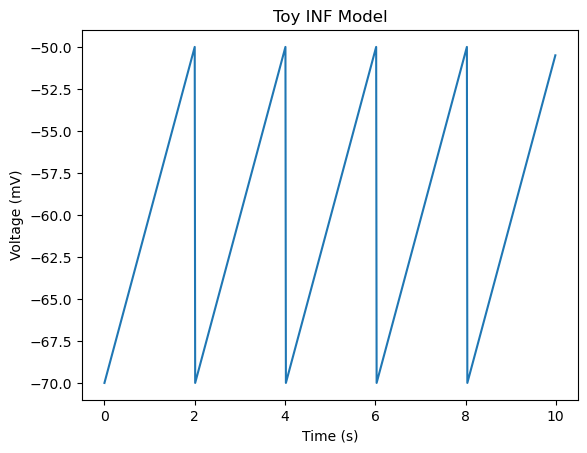

In [77]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C=0.1                   # capcitance created by cell membrane which acts as an insulator that separates intra/extracellular charge
I=1.0                   # current
dt=0.01                 # time step
Vth=-50                 # threshold voltage
Vreset=-70              # reset voltage
V = np.zeros([1000,1])  # initialize voltage array; 1000 rows, 1 col
V[0]=-70                # initial val of V

# Compute voltages using INF single-compartment equation
for i in range(0,999):
    V[i+1] = V[i] + dt*(I/C)
    if V[i+1]>Vth:      # reset voltage if above threshold
        V[i+1]=Vreset

# Create an array of times (x-axis)
t = np.arange(0, len(V))*dt

# Plot
plt.figure()
plt.plot(t,V)
plt.title("Toy INF Model")
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()


___

### LIF Model

C * dV/dt = -im + I for im = gL(V - EL)

**LHS:** membrane capacitance times the rate of change of membrane potential

**RHS:** sum of currents

**Variables**

C --- membrane capacitance

V  --- voltage

t  --- time

im --- "membrane current" (accounts for "leaky channel")

gL --- leak conductance (gL = 1/R)

EL --- equilibrium potential of leak

I  --- external input current (i.e. injected current)

Note: If V(t) = threshold voltage, then V(t + dt) = EL (fire, then reset to EL)

---

**Find a numerical solution:**

C * dV/dt = -gL(V-EL) + I

dV/dt = (-gL(V-EL) + I)*(1/C)

Let dV = V(t+1) - V(t)

Then V(t+1) = (-gL(V-EL) + I)*(dt/C) + V(t)

---

### **Question:** How does LIF differ from INF model?

In the LIF, we define a "leaky channel".
The leaky channel has a conductance (gL) and is dependent on the voltage V. Note: voltage V(t) is still dependent on time.

Note the +/- in the equation as direction of current

**INF:** Cm * dV/dt = I

**LIF:** Cm * dV/dt = -gL(V - EL) + I

**Comparisons:** Both INF and LIF demonstrate the law of conservation of current s.t. LHS = RHS.

**Contrasts:** RHS LIF model is the **sum** of currents from (1) leak channel; (2) external current source (injected current). (recall -- sum of currents; i.e. models with multiple ion channels)


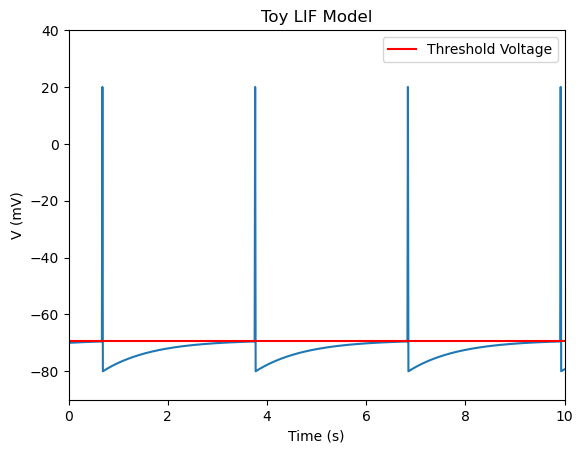

In [155]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C=1.0                   # capcitance
I=1.0                   # current
dt=0.01                 # time step (s)
Vth=-69.5               # threshold voltage
Vreset=-80              # reset voltage
gL=1                    # leak conductance
EL=-70                  # leak equilibrium
V = np.zeros([1000,1])  # initialize voltage array; 1000 rows, 1 col
V[0]=-70                # initial val of V
Vap=20

# Create voltage array with LIF model equation
for i in range(0,999):
    V[i+1] = (-gL*(V[i]-EL) + I)*(dt/C) + V[i]
    if V[i+1]>=Vth:      # if voltage surpasses threshold, then spike and reset voltage.
        V[i]=Vap
        V[i+1]=Vreset    # reset voltage

# Create an array of times
t = np.arange(0, len(V))*dt

# Plot
plt.figure()
plt.plot(t,V)
plt.title("Toy LIF Model")
plt.xlabel('Time (s)')
plt.ylabel('V (mV)')
plt.axhline(y = Vth, color = 'r', linestyle = '-', label='Threshold Voltage') # threshold voltage
legend = plt.legend(loc='upper right')
plt.xlim(0, t_sim)
plt.ylim(Vrest + (-20), Vap + 20)
plt.show()


___

### Toying with other equations

Can we write an LIF model in terms of RC time constant tau


0.07099999999999795
0.06821331794887442


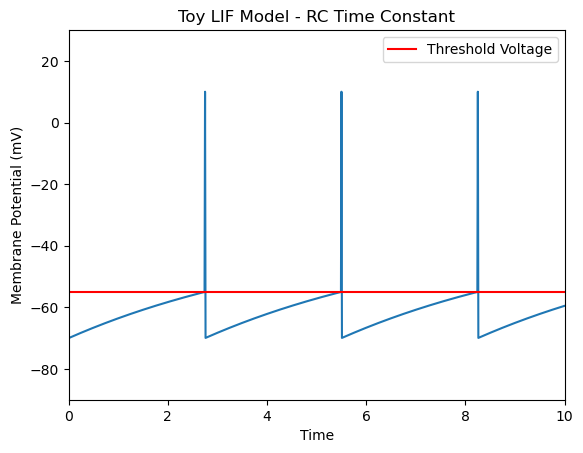

In [256]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
I = 1                 # injected current
tau = 10              # RC time constant (tau = RC)
V = -70               # initial condition (mV)
Vrest = -70           # resting potential (mV)
Vth = -55             # threshold voltage (mV)
Vap = 10              # action potential voltage (mv)
refrac = 10           # length of refractory period
dt = 0.01             # integration timestep size
t_sim = 10            # length time of simulation
v_values = []         # initialize voltage array

# Create an array of times. Note: When plotting, v_values.size == time_values.size
time_values = np.arange(0, t_sim, dt)

for t in time_values:
  if V >= Vth:             # if voltage >= threshold voltage, then spike and reset voltage
    v_values.append(Vap)
    V = Vrest              # reset
  else:                    # otherwise, append voltage to v_values
    v_values.append(V)
  V = V + dt*(((-gL*(V-EL)+I)-V) / tau)

print(v_values[1]-v_values[0])
print(v_values[21]-v_values[20])


# Plot 
plt.plot(time_values, v_values)
plt.title("Toy LIF Model - RC Time Constant")
plt.xlabel("Time")
plt.ylabel("Membrane Potential (mV)")
plt.axhline(y = Vth, color = 'r', linestyle = '-', label='Threshold Voltage') # threshold voltage
legend = plt.legend(loc='upper right')
plt.xlim(0, t_sim)
plt.ylim(Vrest + (-20), Vap + 20)
plt.show()


---

## Overivew of the Izhikevich model

The Izhikevich model can be represented as a two-dimensional system of ODEs:

dvdt = 0.04*(v ** 2) + 5v + 140 - u + I

dudt = a*(b*v - u)

Note: if v>=30 mV, => reset s.t. (v = c) and (u = u+d)

---

#### Variables

v --- membrane potential (mV) wow!

u --- membrane recovery variable; accounts for K+ current activation and Na+ current inactivation; provides negative feedback to v

I --- injected current

t --- time (ms)

a --- time scale of recovery variable u. smaller values of a => slower recovery. typically a=0.02

b --- sensitivity of recovery variable u to subthreshold fluctuations of membrane potential v

c --- after-spike reset value of membrane potential v caused by fast high-threshold K+ conductances. typically c=-65mV

d --- after-spike reset value of recovery variable u caused by slow high-threshold Na+ and K+ conductances. typically d=2



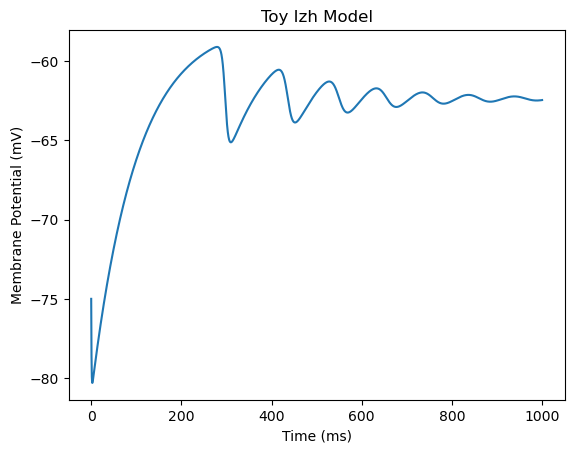

In [451]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Define functions
"""
Descr: dvdt is a function that computes the change in voltage over time, explained by the Izhikevich neuron model.

Eq: dvdt = 0.04*(v**2) + 5*v + 140 - u + I

Args: v, u, I
u --- membrane recovery variable
v --- membrane potential
I --- injected current

Returns: 0.04*(v**2) + 5*v + 140 - u + I
"""
def dvdt(v, u, I):
    return (0.04*(v**2) + 5*v + 140 - u + I)


"""
Descr: dudt is a function that computes the change in membrane recovery over time, explained by the Izhikevich neuron model.

Eq: dudt = a*(b*v - u)

Args: a, b, v, u
a --- time scale of recovery variable u. smaller values of a => slower recovery. typically a=0.02
b --- sensitivity of recovery variable u to subthreshold fluctuations of membrane potential v
v --- membrane potential
u --- membrane recovery variable

Returns:
"""
def dudt(a, b, v, u):
    return (a*(b*v - u))


# Define variables
I=3.7739109347     # injected current
a=0.02  # time scale of recovery variable u
b=0.2
c=-55   # mV
d=4
t_sim=1000  # simulation time
dt=0.1      # time step


# Initialize t, u, v arrays
t_values=np.arange(0, t_sim, dt)  # times
u_values=np.zeros(t_values.size)  # empty array of membrane recovery values
v_values=np.zeros(t_values.size)  # empty array of voltages
v_values[0]=-75                   # initial voltage (mV)
u_values[0]=1                     # initial membrane recovery value


# Build arrays of voltages and membrane recovery values.
for i in range(t_values.size - 1):  # 0 to 99

    if v_values[i]>=30:                # if v>=30 mV, => reset s.t. (v = c) and (u = u+d)
        v_values[i] = c
        u_values[i] = u_values[i]+d
    
    else:
        dv = dvdt(v_values[i], u_values[i], I)
        du = dudt(a, b, v_values[i], u_values[i])
        v_values[i+1] = (v_values[i] + dv*dt)
        u_values[i+1] = (u_values[i] + du*dt)


# Plot voltage trace
plt.figure()
plt.plot(t_values, v_values)
plt.title("Toy Izh Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()

---

## Izh again - messing with parameters (by hand)

**hmmmmmmmmm what if we could make an optimization alg to tune parameters to fit a desired voltage trace instead of changing paprameters this by hand**

Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent

https://www.izhikevich.org/publications/spikes.pdf

In [3]:
"""
Run the above code for dvdt and dudt functions
"""

# Define variables
I=4     # injected current  # 
a=0.01  # time scale of recovery variable u
b=0.2
c=-50   # mV
d=2
t_sim=300  # simulation time
dt=0.1      # time step


# Initialize t, u, v arrays
t_values=np.arange(0, t_sim, dt)  # times
u_values=np.zeros(t_values.size)  # empty array of membrane recovery values
v_values=np.zeros(t_values.size)  # empty array of voltages
v_values[0]=-75                   # initial voltage (mV)
u_values[0]=1                     # initial membrane recovery value


# Build arrays of voltages and membrane recovery values.
for i in range(t_values.size - 1):  # 0 to 99

    if v_values[i]>=30:                # if v>=30 mV, => reset s.t. (v = c) and (u = u+d)
        v_values[i] = c
        u_values[i] = u_values[i]+d
    
    else:
        dv = dvdt(v_values[i], u_values[i], I)
        du = dudt(a, b, v_values[i], u_values[i])
        v_values[i+1] = (v_values[i] + dv*dt)
        u_values[i+1] = (u_values[i] + du*dt)


# Plot voltage trace
plt.figure(figsize=(10,5))
plt.plot(t_values, v_values)
plt.plot(t_values[2700:], v_values[2700:])
plt.title("Toy Izh Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_values[2800:], v_values[2800:])
plt.title("zoom in")
plt.show()

NameError: name 'np' is not defined